In [1]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image

In [51]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celeba/greyscale"
images_data_size = 10000 

width = 178
height = 218
x_ = 100                            # new value of x
image_size_ratio = width / height    # dimensions ratio
y_ = int(image_size_ratio * x_)  
model = Sequential()
model.add(tf.keras.Input(shape=(height, width,1)))
model.add(tf.keras.layers.Normalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same'))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same'))
## changed from (5,5)->(4,2)

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same'))
model.add(Conv2D(filters=8,kernel_size=(2,2),padding = 'same'))
## changed from (3,3)->(1,3)
model.add(tf.keras.layers.Normalization())

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=4))
#model.add(Conv2D(filters=16, kernel_size=(3,3)))
#model.add(Conv2D(filters=16, kernel_size=(2,2)))
model.add(MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Normalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(4, activation='sigmoid'))
original_image_size = (width,height)
df_org = pd.read_csv(attr_data_path)

for i in range(2, 21):
    if (i > 1):
        model = tf.keras.models.load_model('checkpoints/iter'+str(i-1))
        print("model loaded: iter"+str(i-1))
        print("training model "+str(i))
    df = df_org[(1+images_data_size*i):images_data_size*(i+1)]
    df = df.replace(-1,0)
    #print(df.head(5))
    images_data = list()
    for idx in range(df.shape[0]):
        path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
        image = PIL.Image.open(path)
        image_array = np.asarray(image)
        images_data.append(image_array)
    images_data = np.array(images_data)
    def image_from_index(index, size=(original_image_size), path=images_data_path):
        path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
        # to read the image
        image = PIL.Image.open(path).resize(size)
        image_array = np.asarray(image)

        return image_array
    images = images_data # list of array of images
    labels = df[["image_id", "Bangs", "Straight_Hair", "Wavy_Hair", "Wearing_Hat"]]  # dataframe of image features
    train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=45)
    y_test=test_labels.drop(["image_id"],axis=1)
    y_train=train_labels.drop(["image_id"],axis=1)

    X_test=test_images
    X_train=train_images
    #X_train = tf.expand_dims(X_train, axis=-1)
    print("Samples Training Set:",len(X_train))
    X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=42)
    print("Samples in Validation Data:",len(X_val))
    print("Samples in Test Data:",len(X_test))
    x_ = original_image_size[0]
    y_ = original_image_size[1]
    model.compile(optimizer = "adam",loss="binary_crossentropy",metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'categorical_accuracy'])
    training_process = model.fit(X_train,y_train,epochs = 5,validation_data = (X_val,y_val),batch_size=5,shuffle = True)
    model.save('checkpoints/iter'+str(i))

model loaded: iter1
training model 2
Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Epoch 1/5
1400/1400 [==============================] - 29s 20ms/step - loss: 0.3549 - precision_10: 0.6507 - recall_9: 0.3033 - categorical_accuracy: 0.4125 - val_loss: 0.3456 - val_precision_10: 0.7322 - val_recall_9: 0.2764 - val_categorical_accuracy: 0.4780
Epoch 2/5
1400/1400 [==============================] - 28s 20ms/step - loss: 0.3430 - precision_10: 0.6826 - recall_9: 0.3203 - categorical_accuracy: 0.4258 - val_loss: 0.3356 - val_precision_10: 0.6672 - val_recall_9: 0.3980 - val_categorical_accuracy: 0.4720
Epoch 3/5
1400/1400 [==============================] - 30s 21ms/step - loss: 0.3368 - precision_10: 0.6718 - recall_9: 0.3342 - categorical_accuracy: 0.4299 - val_loss: 0.3596 - val_precision_10: 0.7696 - val_recall_9: 0.1315 - val_categorical_accuracy: 0.3960
Epoch 4/5
1400/1400 [==============================] - 31s 22ms/step - loss: 0.3304 - precisi

1400/1400 [==============================] - 27s 20ms/step - loss: 0.3095 - precision_15: 0.7285 - recall_14: 0.4070 - categorical_accuracy: 0.4602 - val_loss: 0.2982 - val_precision_15: 0.6905 - val_recall_14: 0.4590 - val_categorical_accuracy: 0.4440
Epoch 4/5
1400/1400 [==============================] - 27s 20ms/step - loss: 0.3035 - precision_15: 0.7296 - recall_14: 0.4284 - categorical_accuracy: 0.4651 - val_loss: 0.3148 - val_precision_15: 0.6630 - val_recall_14: 0.4610 - val_categorical_accuracy: 0.4747
Epoch 5/5
1400/1400 [==============================] - 27s 20ms/step - loss: 0.3025 - precision_15: 0.7249 - recall_14: 0.4193 - categorical_accuracy: 0.4578 - val_loss: 0.3147 - val_precision_15: 0.7269 - val_recall_14: 0.3752 - val_categorical_accuracy: 0.4120
INFO:tensorflow:Assets written to: checkpoints/iter7\assets
model loaded: iter7
training model 8
Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Epoch 1/5
1400/1400 [================

KeyboardInterrupt: 

Empty box

In [40]:
model.evaluate(X_test,y_test)
#model.save_weights('./saved_models/model1.2')

47/47 [==============================] - 2s 33ms/step - loss: -3543840600409243648.0000 - precision_6: 0.0000e+00 - recall_5: 0.0000e+00 - categorical_accuracy: 0.5047


[-3.5438406004092436e+18, 0.0, 0.0, 0.5046666860580444]

In [46]:
model.predict(X_test)[1]
#print(y_test[1])

array([0., 0., 0., 0.], dtype=float32)

Index(['Bangs', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Hat'], dtype='object')
Bangs            1
Straight_Hair   -1
Wavy_Hair        1
Wearing_Hat     -1
Name: 13844, dtype: int64


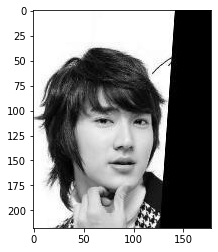

In [45]:
plt.imshow(X_test[1], cmap='gray')
print(labels.columns[1:])
print(y_test.iloc[1])